# Project: Wrangle and Analyze Data (Twitter - We Rate Dogs)
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#gather">Gathering</a></li>
<li><a href="#assess">Assessing</a></li>
<li><a href="#Issues">Issues</a></li>
<li><a href="#clean">Cleaning</a></li>
<li><a href="#store">Storing</a></li>
<li><a href="#analyze">Analyzing</a></li>
<li><a href="#conclusion">Conclusions</a></li>
<li><a href="#references">References</a></li>
</ul>

<a id='intro'></a>
# Introduction

The dataset is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.
In this project, I will be wrangling (and analyzing and visualizing) the dataset using Python libraries NumPy, pandas, Matplotlib, tweepy, requests and json. 

In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import time
import os
import matplotlib.pyplot as plt
from tweepy import OAuthHandler
from timeit import default_timer as timer
%matplotlib inline
print('complete')

complete


<a id='gather'></a>
# Gathering

In this section, we load the data from all the different sources. The data is fetched from 3 different sources
- The provided CSV file from Udacity
- Additional data about each tweet retrieved from Twitter API (Tweepy Library)
- a file downloaded programatically, with breed predictions for each dog

### Import file into Pandas dataframe

In [2]:
df_1=pd.read_csv('twitter-archive-enhanced.csv')
df_1.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


### Programatically download file from the internet

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response
#200 response code means it ran perfectly

<Response [200]>

In [4]:
with open(os.path.join(url.split('/')[-1]), mode='wb') as file:
        file.write(response.content)
        
predictions = pd.read_csv('image-predictions.tsv', sep='\t')

Using Tweepy API keys to confirm if API codes were succsessfully implemented

In [5]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = xxxx
consumer_secret = xxxx
access_token = xxxx
access_secret = xxxx

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293: 838083903487373313
Success


Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success
550: 805207613751304193
Success


Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807: 772102971039580160
Success
808

Success
1034: 745074613265149952
Success
1035: 745057283344719872
Success
1036: 744995568523612160
Success
1037: 744971049620602880
Success
1038: 744709971296780288
Success
1039: 744334592493166593
Success
1040: 744234799360020481
Success
1041: 744223424764059648
Success
1042: 743980027717509120
Success
1043: 743895849529389061
Success
1044: 743835915802583040
Success
1045: 743609206067040256
Success
1046: 743595368194129920
Success
1047: 743545585370791937
Success
1048: 743510151680958465
Success
1049: 743253157753532416
Success
1050: 743222593470234624
Success
1051: 743210557239623680
Success
1052: 742534281772302336
Success
1053: 742528092657332225
Success
1054: 742465774154047488
Success
1055: 742423170473463808
Success
1056: 742385895052087300
Success
1057: 742161199639494656
Success
1058: 742150209887731712
Success
1059: 741793263812808706
Success
1060: 741743634094141440
Success
1061: 741438259667034112
Success
1062: 741303864243200000
Success
1063: 741099773336379392
Success
10

Success
1283: 708738143638450176
Success
1284: 708711088997666817
Success
1285: 708479650088034305
Success
1286: 708469915515297792
Success
1287: 708400866336894977
Success
1288: 708356463048204288
Success
1289: 708349470027751425
Success
1290: 708149363256774660
Success
1291: 708130923141795840
Success
1292: 708119489313951744
Success
1293: 708109389455101952
Success
1294: 708026248782585858
Success
1295: 707995814724026368
Success
1296: 707983188426153984
Success
1297: 707969809498152960
Success
1298: 707776935007539200
Success
1299: 707741517457260545
Success
1300: 707738799544082433
Success
1301: 707693576495472641
Success
1302: 707629649552134146
Success
1303: 707610948723478529
Success
1304: 707420581654872064
Success
1305: 707411934438625280
Success
1306: 707387676719185920
Success
1307: 707377100785885184
Success
1308: 707315916783140866
Success
1309: 707297311098011648
Success
1310: 707059547140169728
Success
1311: 707038192327901184
Success
1312: 707021089608753152
Success
13

Success
1532: 690015576308211712
Success
1533: 690005060500217858
Success
1534: 689999384604450816
Success
1535: 689993469801164801
Success
1536: 689977555533848577
Success
1537: 689905486972461056
Success
1538: 689877686181715968
Success
1539: 689835978131935233
Success
1540: 689661964914655233
Success
1541: 689659372465688576
Success
1542: 689623661272240129
Success
1543: 689599056876867584
Success
1544: 689557536375177216
Success
1545: 689517482558820352
Success
1546: 689289219123089408
Success
1547: 689283819090870273
Success
1548: 689280876073582592
Success
1549: 689275259254616065
Success
1550: 689255633275777024
Success
1551: 689154315265683456
Success
1552: 689143371370250240
Success
1553: 688916208532455424
Success
1554: 688908934925697024
Success
1555: 688898160958271489
Success
1556: 688894073864884227
Success
1557: 688828561667567616
Success
1558: 688804835492233216
Success
1559: 688789766343622656
Success
1560: 688547210804498433
Success
1561: 688519176466644993
Success
15

Success
1781: 677700003327029250
Success
1782: 677698403548192770
Success
1783: 677687604918272002
Success
1784: 677673981332312066
Success
1785: 677662372920729601
Success
1786: 677644091929329666
Success
1787: 677573743309385728
Success
1788: 677565715327688705
Success
1789: 677557565589463040
Success
1790: 677547928504967168
Success
1791: 677530072887205888
Success
1792: 677335745548390400
Success
1793: 677334615166730240
Success
1794: 677331501395156992
Success
1795: 677328882937298944
Success
1796: 677314812125323265
Success
1797: 677301033169788928
Success
1798: 677269281705472000
Success
1799: 677228873407442944
Success
1800: 677187300187611136
Success
1801: 676975532580409345
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
1810: 676864501615042560
Success
18

Success
2030: 671855973984772097
Success
2031: 671789708968640512
Success
2032: 671768281401958400
Success
2033: 671763349865160704
Success
2034: 671744970634719232
Success
2035: 671743150407421952
Success
2036: 671735591348891648
Success
2037: 671729906628341761
Success
2038: 671561002136281088
Success
2039: 671550332464455680
Success
2040: 671547767500775424
Success
2041: 671544874165002241
Success
2042: 671542985629241344
Success
2043: 671538301157904385
Success
2044: 671536543010570240
Success
2045: 671533943490011136
Success
2046: 671528761649688577
Fail
2047: 671520732782923777
Success
2048: 671518598289059840
Success
2049: 671511350426865664
Success
2050: 671504605491109889
Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
2058: 671355857343524864
Success
2059: 671347597085433856
Success
2060:

Success
2279: 667435689202614272
Success
2280: 667405339315146752
Success
2281: 667393430834667520
Success
2282: 667369227918143488
Success
2283: 667211855547486208
Success
2284: 667200525029539841
Success
2285: 667192066997374976
Success
2286: 667188689915760640
Success
2287: 667182792070062081
Success
2288: 667177989038297088
Success
2289: 667176164155375616
Success
2290: 667174963120574464
Success
2291: 667171260800061440
Success
2292: 667165590075940865
Success
2293: 667160273090932737
Success
2294: 667152164079423490
Success
2295: 667138269671505920
Success
2296: 667119796878725120
Success
2297: 667090893657276420
Success
2298: 667073648344346624
Success
2299: 667070482143944705
Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
2307: 666835007768551424
Success
2308: 666826780179869698
Success
23

In [6]:
# Create a dataframe with the tweet ids in twitter_archive-enhanced.csv
tweet_ids = df_1.tweet_id.values
print("No of tweet_ids: " + str(len(tweet_ids)) + "\n")

No of tweet_ids: 2356



In [7]:
# retrieve the full JSON for the status of each id in twitter-archive-enhanced.csv
total_no = 0
fails_dict = {}
list_tweet_json = []

for ids in tweet_ids:
    total_no += 1
    try:
        # Get the tweet's JSON data and add them to the tweet JSON list
        tweet = api.get_status(ids, tweet_mode = 'extended')
        list_tweet_json.append(tweet._json)
        
    except tweepy.TweepyException as err:
        fails_dict[ids] = err
        pass
    
  # display list of tweets with errors
print("Number of Errors:  {}\n".format(len(fails_dict)))
for tweet_id in fails_dict:
    print(tweet_id, fails_dict[tweet_id])
    

Number of Errors:  42

888202515573088257 404 Not Found
144 - No status found with that ID.
873697596434513921 404 Not Found
144 - No status found with that ID.
872668790621863937 404 Not Found
144 - No status found with that ID.
872261713294495745 404 Not Found
144 - No status found with that ID.
869988702071779329 404 Not Found
144 - No status found with that ID.
866816280283807744 404 Not Found
144 - No status found with that ID.
861769973181624320 404 Not Found
144 - No status found with that ID.
856602993587888130 404 Not Found
144 - No status found with that ID.
856330835276025856 404 Not Found
144 - No status found with that ID.
851953902622658560 404 Not Found
144 - No status found with that ID.
851861385021730816 404 Not Found
144 - No status found with that ID.
845459076796616705 404 Not Found
144 - No status found with that ID.
844704788403113984 404 Not Found
144 - No status found with that ID.
842892208864923648 404 Not Found
144 - No status found with that ID.
83736628487

In [8]:
tweet_json = 'tweet_json.txt'

with open(tweet_json, 'r',  encoding='utf-8') as file:
    for tweet_json in list_tweet_json:
        json.dump(tweet_json, file)
        file.write('\n')

UnsupportedOperation: not writable

In [9]:
ls tweet_json.txt

 Volume in drive C has no label.
 Volume Serial Number is 9EF5-3ACC

 Directory of C:\Users\ADMIN\Documents\UDACITY PROJECT\WeRateDogs

09/02/2022  01:53 PM        10,537,806 tweet_json.txt
               1 File(s)     10,537,806 bytes
               0 Dir(s)  382,985,510,912 bytes free


Read the content of the json file, then extract the needed data/field. Use the extracted data to create a Data Frame

In [10]:
df_2 = []
with open('tweet_json.txt') as file:
    for line in file:
        field = (json.loads(line))
        field_id = field['id']
        field_retweet_count = field['retweet_count']
        field_favorite_count = field['favorite_count']
        field_create_date = field['created_at']
        df_2.append({'retweet_count' : field_retweet_count,
                  'favorite_count' : field_favorite_count,
                  'tweet_id' : field_id})
        
extra_data = pd.DataFrame(df_2, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

In [11]:
extra_data.to_csv('tweet_extra_data.csv', index = False)

<a id='assess'></a>
# Assessing

In this section, I'll be checking the 3 dataframes sets for two things: tidiness and data quality issues. 
Data that has issues with its contents: missing, corrupted, inacurate, duplicate or incorrect data (quality issues) is called "dirty data".
"Messy" or "Untidy" data defines data with structural issues.

### Virtual Assessment
Looking through the dataframe (it's rows and columns) and understanding what it is all about.

In [12]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [13]:
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [14]:
extra_data = pd.read_csv('tweet_extra_data.csv')
extra_data.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6973,33701
1,892177421306343426,5275,29228
2,891815181378084864,3464,21976
3,891689557279858688,7193,36795
4,891327558926688256,7719,35187


### Programatical Assessment
This involves the use of code to drill deeper and further find out issues with tidiness and quality.

##### Twitter Archive DataFrame

In [15]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [16]:
# Checking to see if there are duplicated IDs in the twitter_archive dataframe
twitter_archive[twitter_archive.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


There are no duplicated tweets in the data frame

In [17]:
#The ratings are majorly judged over 10. Any number not equal to 10 is a possible quality issue.
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [18]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [19]:
# Source column value counts
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [20]:
# Checking to see if there are any records that are retweets
len(twitter_archive[twitter_archive.retweeted_status_id.isnull() == False])

181

In [21]:
# Dog names
twitter_archive.name.value_counts().head(30)

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
Oliver      11
Tucker      10
Penny       10
Lola        10
Winston      9
Bo           9
Sadie        8
the          8
Daisy        7
Buddy        7
Toby         7
an           7
Bailey       7
Leo          6
Oscar        6
Stanley      6
Rusty        6
Bella        6
Dave         6
Jack         6
Koda         6
Scout        6
Jax          6
Milo         6
Louis        5
Name: name, dtype: int64

##### Image Prediction DataFrame

In [22]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [23]:
extra_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312 entries, 0 to 2311
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2312 non-null   int64
 1   retweet_count   2312 non-null   int64
 2   favorite_count  2312 non-null   int64
dtypes: int64(3)
memory usage: 54.3 KB


In [24]:
# Checking  to see if there duplicated columns in the 3 Data Frames.
duplicated_columns = pd.Series(list(twitter_archive) + list(image_predictions) + list(extra_data))
duplicated_columns[duplicated_columns.duplicated()]


17    tweet_id
29    tweet_id
dtype: object

Only the tweet_id column is duplicated across the dataframes, this is fine.

<a id='Issues'></a>
# Issues

### Quality

- There is unnecesary HTML code in the source column.
- The datatype for Tweet_id fields in the three dataframes are integers and should be strings.
- The timestamp column in twitter_archive dataframe should be in datatime data type.
- Some of the tweets are retweets or replies. We need only original tweets. Drop rows containing retweets and replies.
- Some tweet_id in the image_prediction dataframe (2075 entries) are missing in the twitter_archive df (2356 entries). 
- rating_denominator column has values other than 10
- Some records have more than one dog stage
- Some dog names have errors (e.g. a, an, actually, by)

### Tidiness

- Columns with the same information (floofer, pupper, puppo, doggo) should be merged into one.
- Merge the two dataframes (twitter_archive and extra_data) together to have a neater dataset.

<a id='clean'></a>
# Cleaning

In [25]:
# create copies of the datasets
twitter_clean = twitter_archive.copy()
image_clean = image_predictions.copy()
extra_clean = extra_data.copy()

## Quality
### 1. There is unnecesary HTML code in the source column.
### Define
Remove all html anchor tags in source column and keep just the text in between the tags. 
Convert the datatype from string to categorical.

### Code

In [26]:
twitter_clean['source'] = twitter_clean['source'].str.extract('^<a.+>(.+)</a>$')

In [27]:
twitter_clean.source = twitter_clean.source.astype('category')

### Test

In [28]:
twitter_clean['source'].value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

### 2. The datatype for Tweet_id fields in the three dataframes are integers and should be strings (objects).
### Define
Change the data type of the columns from int to stringss
### Code

In [29]:
twitter_clean['tweet_id'] = twitter_clean['tweet_id'].astype(str)
image_clean['tweet_id'] = image_clean['tweet_id'].astype(str)
extra_clean['tweet_id'] = extra_clean['tweet_id'].astype(str)

### Test

In [30]:
print(twitter_clean['tweet_id'].dtype)
print(image_clean['tweet_id'].dtype)
print(extra_clean['tweet_id'].dtype)

object
object
object


### 3. The timestamp column in twitter_archive dataframe should be in datatime data type.
### Define
Change the data type of timestamp from string to object

### Code

In [31]:
twitter_clean['timestamp'] = pd.to_datetime(twitter_clean['timestamp'])

### Test

In [32]:
print(twitter_clean['timestamp'].dtype)

datetime64[ns, UTC]


### 4. Some of the tweets are retweets or replies. We need only original tweets. Drop rows containing retweets and replies.
Remove all rows in the twitter_clean that have retweets or replies (values in the rows in_reply_to_status_id or retweeted_status_id). 
Drop the two columns plus retweeted_status_user_id, retweeted_status_timestamp and in_reply_to_user_id

### Code

In [33]:
twitter_clean = twitter_clean[(twitter_clean.in_reply_to_status_id.isna() == True)  & (twitter_clean.retweeted_status_id.isna() == True)]

twitter_clean = twitter_clean.drop(['in_reply_to_status_id',
                                  'in_reply_to_user_id',
                                  'retweeted_status_id',
                                  'retweeted_status_user_id',
                                  'retweeted_status_timestamp'],
                                    axis = 1)

### Test

In [34]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   category           
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                2097 non-null   object             
 8   doggo               2097 non-null   object             
 9   floofer             2097 non-null   object             
 10  pupper              2097 non-null   object             
 11  puppo               2097 non-null   object             
dtypes: category(1), datetime64[ns, UTC

### 5. Some tweet_id in the image_prediction dataframe (2075 entries) are missing in the twitter_archive df (2356 entries).
Remove all rows in twitter_archive with missing tweet_id and keep only those found.
### Code

In [35]:
twitter_clean = twitter_clean[twitter_clean.tweet_id.isin(image_clean.tweet_id)]

### Test

In [36]:
len(twitter_clean[twitter_clean.tweet_id.isin(image_clean.tweet_id)])

1971

### 6. Some dog names have errors (e.g. a, an, actually, by)
Replace all dog names having lowercase case column with None

### Code

In [37]:
twitter_clean['name'][twitter_clean['name'].str.match('[a-z]+')] = 'None'

In [38]:
# Dropping the rows with None value
twitter_clean = twitter_clean[twitter_clean['name'].str.contains("None") == False]

### Test

In [39]:
twitter_clean.name[twitter_clean.name == 'None'].value_counts()

Series([], Name: name, dtype: int64)

In [40]:
# Check to see if there's any name starting with lowercase
twitter_clean.name.value_counts().sort_index(ascending=False)

Zuzu     1
Zooey    1
Zoey     3
Zoe      1
Ziva     1
        ..
Aiden    1
Adele    1
Acro     1
Ace      1
Abby     2
Name: name, Length: 912, dtype: int64

### 7. Some records have more than one dog stage
Query the number of records in the twitter_clean df that have multiple dog stages, read through the tweet to understand the actual dog stage then change the record to match the actual dog stage
### Code

In [41]:
print(len(twitter_clean[(twitter_clean.doggo != 'None') & (twitter_clean.floofer != 'None')]))
print(len(twitter_clean[(twitter_clean.doggo != 'None') & (twitter_clean.puppo != 'None')]))
print(len(twitter_clean[(twitter_clean.doggo != 'None') & (twitter_clean.pupper != 'None')]))

0
0
4


From the result of the query, there is one record that has both doggo and floofer and another record that has both doggo and puppo. For these 2 records, i will look at the tweet to decide which dog stage is the right one.

Also, there are 8 records which have both doggo and pupper. From the dogtionary, doggo and pupper are sometimes used interchangeably. Therefore, set pupper column as None for these 9 records.

In [42]:
for i, row in twitter_clean[((twitter_clean.doggo != 'None') & (twitter_clean.floofer != 'None'))
                   | ((twitter_clean.doggo != 'None') & (twitter_clean.puppo != 'None'))].iterrows():
    print('%s %s\n'%(row.tweet_id, row.text))

In [43]:
# set pupper as None for records which have both doggo and pupper
twitter_clean['pupper'][(twitter_clean.doggo != 'None') & (twitter_clean.pupper != 'None')] = 'None'

In [44]:
twitter_clean['doggo'][(twitter_clean.doggo != 'None') & (twitter_clean.floofer != 'None')] = 'None'

In [45]:
twitter_clean['doggo'][(twitter_clean.doggo != 'None') & (twitter_clean.puppo != 'None')] = 'None'

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_16244\1596318538.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_clean['doggo'][(twitter_clean.doggo != 'None') & (twitter_clean.puppo != 'None')] = 'None'


### Test

In [46]:
len(twitter_clean[((twitter_clean.doggo != 'None') & (twitter_clean.pupper != 'None'))
                 | ((twitter_clean.doggo != 'None') & (twitter_clean.floofer != 'None')) 
                 | ((twitter_clean.doggo != 'None') & (twitter_clean.puppo != 'None'))])

0

### 8. Rating_denominator column has values other than 10
Drop the remaining observations with rating_denominator values that are NOT equal to 10.

### Code

In [47]:
# display all denominators count
twitter_clean.rating_denominator.value_counts().sort_index(ascending = False)

50       1
11       1
10    1346
7        1
Name: rating_denominator, dtype: int64

In [48]:
twitter_clean = twitter_clean[twitter_clean.rating_denominator == 10]

### Test

In [49]:
# recheck the column values - should only be "10"
twitter_clean.rating_denominator.value_counts().sort_index(ascending = False)

10    1346
Name: rating_denominator, dtype: int64

## Tidiness
### 1. Columns with the same information (floofer, pupper, puppo, doggo) should be merged into one..
### Define
Merge the doggo, floofer, pupper and puppo columns to a column called stage. 
After merging, convert the datatype from string to categorical as it aids analysis
### Code

In [50]:
twitter_clean['stage'] = twitter_clean[['doggo', 'floofer', 'pupper', 'puppo']].max(axis=1)

In [51]:
twitter_clean.stage = twitter_clean.stage.astype('category')

In [52]:
# drop the doggo, floofer, pupper and puppo columns as they are no longer needed
twitter_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

### Test

In [53]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1346 entries, 0 to 2325
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1346 non-null   object             
 1   timestamp           1346 non-null   datetime64[ns, UTC]
 2   source              1346 non-null   category           
 3   text                1346 non-null   object             
 4   expanded_urls       1346 non-null   object             
 5   rating_numerator    1346 non-null   int64              
 6   rating_denominator  1346 non-null   int64              
 7   name                1346 non-null   object             
 8   stage               1346 non-null   category           
dtypes: category(2), datetime64[ns, UTC](1), int64(2), object(4)
memory usage: 87.2+ KB


### Merge the two dataframes (twitter_clean and extra_clean) together to have a neater dataset.
### Define
Merge both dataframes on 'tweet_id'. Left join to preserve all tweets. This will give us a master dataframe to work with
### Code

In [54]:
master_df= pd.merge(twitter_clean, extra_clean, on= 'tweet_id', how= 'left')

### Test

In [55]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1346 entries, 0 to 1345
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1346 non-null   object             
 1   timestamp           1346 non-null   datetime64[ns, UTC]
 2   source              1346 non-null   category           
 3   text                1346 non-null   object             
 4   expanded_urls       1346 non-null   object             
 5   rating_numerator    1346 non-null   int64              
 6   rating_denominator  1346 non-null   int64              
 7   name                1346 non-null   object             
 8   stage               1346 non-null   category           
 9   retweet_count       1331 non-null   float64            
 10  favorite_count      1331 non-null   float64            
dtypes: category(2), datetime64[ns, UTC](1), float64(2), int64(2), object(4)
memory usage: 108.2+ KB

In [56]:
master_df.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,6973.0,33701.0
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,5275.0,29228.0


<a id='store'></a>
# Storing Data 

The cleaned twitter archive data in twitter_clean is ready for the analysis. I will store the twitter_clean dataframe into the ' twitter_archive_master.csv' file.

In [60]:
master_df.to_csv('twitter_archive_master.csv', index = False)

In [61]:
ls *.csv

 Volume in drive C has no label.
 Volume Serial Number is 9EF5-3ACC

 Directory of C:\Users\ADMIN\Documents\UDACITY PROJECT\WeRateDogs

09/02/2022  02:58 PM            67,974 tweet_extra_data.csv
09/02/2022  03:02 PM           426,243 twitter_archive_master.csv
08/19/2022  03:34 PM           915,692 twitter-archive-enhanced.csv
               3 File(s)      1,409,909 bytes
               0 Dir(s)  383,020,716,032 bytes free


<a id='analyze'></a>
# Analyzing Data

In [62]:
# For analysis, load the twitter_archive_master dataframe
archive_df = pd.read_csv("C:/Users/ADMIN/Documents/UDACITY PROJECT/WeRateDogs/twitter_archive_master.csv")

In [63]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1346 entries, 0 to 1345
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1346 non-null   int64  
 1   timestamp           1346 non-null   object 
 2   source              1346 non-null   object 
 3   text                1346 non-null   object 
 4   expanded_urls       1346 non-null   object 
 5   rating_numerator    1346 non-null   int64  
 6   rating_denominator  1346 non-null   int64  
 7   name                1346 non-null   object 
 8   stage               1346 non-null   object 
 9   retweet_count       1331 non-null   float64
 10  favorite_count      1331 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 115.8+ KB


In [65]:
archive_df.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,6973.0,33701.0
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,5275.0,29228.0


Now, I will explore the data to try and answer the following questions:
- Which source is the most used?
- What's the most popular dog name?
- Which dog received highest number of likes?
- Which dog received highest number of retweets?


I will use the Vega-Altair visualization library to create beautiful charts.

In [66]:
import altair as alt

### Which source is the most used?

In [67]:
archive_df['source'].value_counts()

Twitter for iPhone    1321
Twitter Web Client      16
TweetDeck                9
Name: source, dtype: int64

In [68]:
alt.Chart(archive_df[archive_df['source']!= 'unknown']).mark_bar(color='purple', opacity=0.5).encode(
    alt.Y('source', axis=alt.Axis(title='Tweet Source')),
    alt.X('count(source):Q', axis=alt.Axis(title='Sources Count'))
        ).properties(title = 'Most used source')

alt.Chart(...)

About 98% of the tweets posted by WeRateDogs is from Twitter iPhone app.

### What's the most popular dog name?

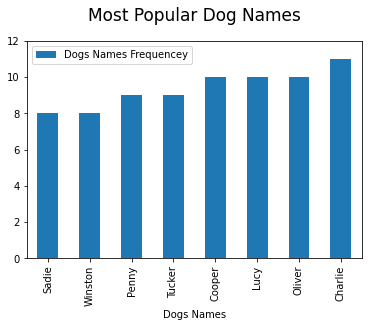

In [69]:
dog_name = archive_df.query('name == name')
grouped_dog_name = dog_name.groupby('name').count()[['tweet_id']]
grouped_dog_name.rename(columns={'tweet_id':'name_count'}, inplace=True)
grouped_dog_name.query('name_count >= 8').sort_values(by=['name_count']).plot.bar()
plt.ylim(top=12)
plt.title("Most Popular Dog Names",{'fontsize': 17},pad=20)
plt.xlabel("Dogs Names")
plt.legend(["Dogs Names Frequencey"])

The most popular dog name is Charlie

### Which dog received highest number of likes?

In [70]:
archive_df[archive_df.favorite_count == archive_df.favorite_count.max()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count
317,807106840509214720,2016-12-09 06:17:20+00:00,Twitter for iPhone,This is Stephan. He just wants to help. 13/10 ...,https://twitter.com/dog_rates/status/807106840...,13,10,Stephan,None,51443.0,111230.0


Stephan (tweet_id: 807106840509214720) received the highest number of likes (favorite count).

### Which dog received highest number of retweets?

In [74]:
archive_df[archive_df.retweet_count == archive_df.retweet_count.max()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count
317,807106840509214720,2016-12-09 06:17:20+00:00,Twitter for iPhone,This is Stephan. He just wants to help. 13/10 ...,https://twitter.com/dog_rates/status/807106840...,13,10,Stephan,None,51443.0,111230.0


Stephan (tweet_id: 807106840509214720) also received the highest number of retweets.

<a id='conclusion'></a>
# Conclusion

I'm glad I've been able to complete this project. It really took a toll on me. I initially thought it would be a breeze but as I began to work on it, my thinking changed.
I initially started working with the API provided by Udacity,but there was a re-occuring error message 'invalid or expired token'. This was when I realized I had to get my own developer account. It was a bit difficult getting my twitter developer account approved, I received series of mails from the twitter dev team on what I wanted the approval for. Thankfully it finally came through.

When I tried the querying Twitter’s API, it became obvious that I needed to go over the study material over and over to fully understand the process.A lot of times, I had to go back to cleaning over and over and even now, I'm still sure that if I look at the datasets again, I'll still find some issues to clean and work on.

This project was exciting, I feel like one superhero Data Analyst.

<a id='references'></a>
# References

To finish this project, I got some help from:
- [Merge, join, concatenate and compare in pandas] https://pandas.pydata.org/docs/user_guide/merging.html
- [Accessing data from twitter using tweepy] https://towardsdatascience.com/how-to-access-data-from-the-twitter-api-using-tweepy-python-e2d9e4d54978
- Video tutorials from [YouTube](https://youtube.com)
- [Pandas documentation](https://pandas.pydata.org/docs/user_guide/index.html)
- [Matplotlib documentation](https://matplotlib.org/stable/index.html)